# **DATA PREPROCESSING**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('adult.csv', na_values=['#NAME ?'])
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
data['income'].describe()

count      32561
unique         2
top        <=50K
freq       24720
Name: income, dtype: object

In [6]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

# 1. INSTANTIATE
# encode labels with value between 0 and n_classes-1.
le = preprocessing.LabelEncoder()

# 2/3. FIT AND TRANSFORM
# use df.apply() to apply le.fit_transform to all columns
data = data.apply(le.fit_transform)

data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,22,7,2671,9,12,4,1,1,4,1,25,0,39,39,0
1,33,6,2926,9,12,2,4,0,4,1,0,0,12,39,0
2,21,4,14086,11,8,0,6,1,4,1,0,0,39,39,0
3,36,4,15336,1,6,2,6,0,2,1,0,0,39,39,0
4,11,4,19355,9,12,2,10,5,2,0,0,0,39,5,0


In [7]:
#get to view our our diagnosis column values are distributed
data['income'].value_counts()

0    24720
1     7841
Name: income, dtype: int64

# Data Exploration

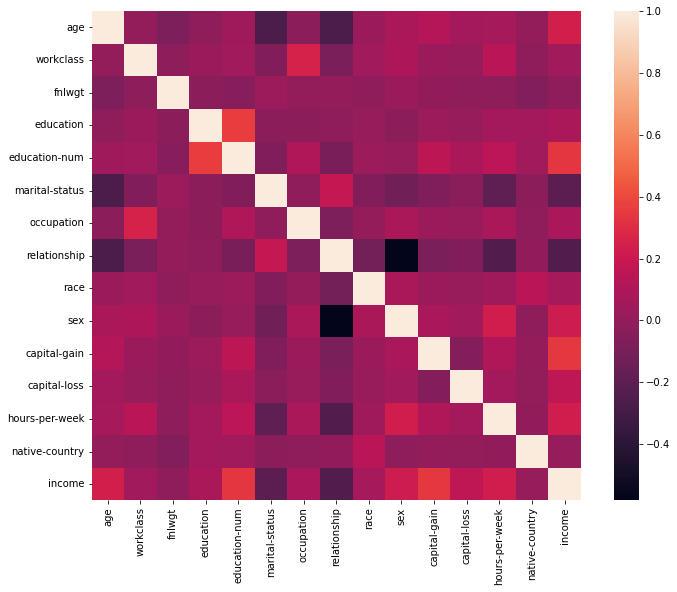

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
#correlation matrix
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1, square=True);

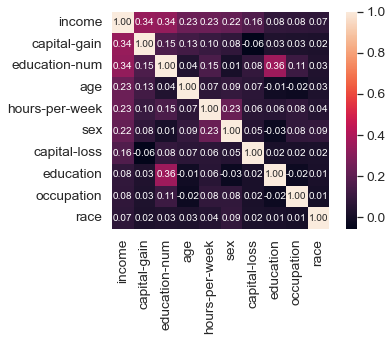

In [9]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'income')['income'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [10]:
#Remove correlation below 0.1
data.drop('race',axis=1,inplace=True)
data.drop('occupation',axis=1,inplace=True)
data.drop(['education'],axis=1,inplace=True)
data.drop(['capital-loss'],axis=1,inplace=True)
data.head()

,age,workclass,fnlwgt,education-num,marital-status,relationship,sex,capital-gain,hours-per-week,native-country,income
0,22,7,2671,12,4,1,1,25,39,39,0
1,33,6,2926,12,2,0,1,0,12,39,0
2,21,4,14086,8,0,1,1,0,39,39,0
3,36,4,15336,6,2,0,1,0,39,39,0
4,11,4,19355,12,2,5,0,0,39,5,0


## Prepare train and test dataset

In [11]:
#creating our X feature variables and y outcome variable
#X = data.drop('diagnosis',axis=1)
X = data.drop('income',axis=1)
y = data['income']

In [12]:
#splitting our data into training and testing data set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

# **Random Forest Classification**

### train_array(X_train) = train dataset WITHOUT occupancy

### test_array(X_test) = test dataset WITHOUT occupancy
### occlabel_array(y_train) = 'Occupancy' label from train dataset

In [13]:
#Random Forest Classification
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier()
clf.fit(X_train,y_train)


RandomForestClassifier()

In [14]:
#To predict occupancy using the test's set features
clf_pred=clf.predict(X_test)
print(clf_pred)

[0 0 1 ... 1 0 0]


In [15]:
# Transfer the array of predicted popularity of test data into dataframe
clf_pred_df = pd.DataFrame(data=clf_pred, columns=['income'])
clf_pred_df.head(10)

,income
0,0
1,0
2,1
3,1
4,0
5,1
6,1
7,0
8,1
9,0


In [16]:
RFprob_each = clf.predict_proba(X_test)
RFprob_each

array([[0.99, 0.01],
       [1.  , 0.  ],
       [0.48, 0.52],
       ...,
       [0.03, 0.97],
       [1.  , 0.  ],
       [0.99, 0.01]])

In [17]:
pos_prob = []
for inner in RFprob_each:
    pos_prob.append(inner[1])
pos_prob[0:10]


[0.01, 0.0, 0.52, 0.51, 0.27, 0.86, 0.54, 0.17, 0.8, 0.07]

In [18]:
X_test

,age,workclass,fnlwgt,education-num,marital-status,relationship,sex,capital-gain,hours-per-week,native-country
16054,25,7,8550,8,4,1,1,0,39,39
32382,27,2,7772,8,0,4,0,0,39,39
10749,22,2,16513,12,2,0,1,0,39,39
15377,22,4,7565,8,2,0,1,0,39,39
29660,12,1,4376,9,4,1,0,0,39,39
...,...,...,...,...,...,...,...,...,...,...
29785,11,4,14911,8,4,1,0,0,39,39
8912,40,4,9800,12,2,0,1,0,39,39
12599,32,4,10171,12,2,0,1,79,39,39
20781,9,4,13925,9,4,1,1,0,19,39


In [19]:
X_testdf = X_test.copy()
X_testdf.insert(len(X_testdf.columns),'y_test income',y_test)
X_testdf = X_testdf.reset_index(drop=True)
X_testdf

,age,workclass,fnlwgt,education-num,marital-status,relationship,sex,capital-gain,hours-per-week,native-country,y_test income
0,25,7,8550,8,4,1,1,0,39,39,1
1,27,2,7772,8,0,4,0,0,39,39,0
2,22,2,16513,12,2,0,1,0,39,39,0
3,22,4,7565,8,2,0,1,0,39,39,0
4,12,1,4376,9,4,1,0,0,39,39,0
...,...,...,...,...,...,...,...,...,...,...,...
6508,11,4,14911,8,4,1,0,0,39,39,0
6509,40,4,9800,12,2,0,1,0,39,39,1
6510,32,4,10171,12,2,0,1,79,39,39,1
6511,9,4,13925,9,4,1,1,0,19,39,0


In [20]:
# Insert result into test_wtpopl, check the prediction correctness
X_testdf.insert(len(X_testdf.columns), 'RForest', clf_pred_df['income'])
X_testdf

,age,workclass,fnlwgt,education-num,marital-status,relationship,sex,capital-gain,hours-per-week,native-country,y_test income,RForest
0,25,7,8550,8,4,1,1,0,39,39,1,0
1,27,2,7772,8,0,4,0,0,39,39,0,0
2,22,2,16513,12,2,0,1,0,39,39,0,1
3,22,4,7565,8,2,0,1,0,39,39,0,1
4,12,1,4376,9,4,1,0,0,39,39,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6508,11,4,14911,8,4,1,0,0,39,39,0,0
6509,40,4,9800,12,2,0,1,0,39,39,1,1
6510,32,4,10171,12,2,0,1,79,39,39,1,1
6511,9,4,13925,9,4,1,1,0,19,39,0,0


# **Naive Bayes**

In [21]:
from sklearn.naive_bayes import GaussianNB

gaus = GaussianNB()
gaus.fit(X_train, y_train)

GaussianNB()

In [22]:
# To predict popularity using test set's features
NB_pred= gaus.predict(X_test)
print(NB_pred)

[0 0 0 ... 1 0 0]


In [23]:
# Transfer the array of predicted popularity of test data into dataframe
NB_pred_df = pd.DataFrame(data=NB_pred, columns=['income'])
NB_pred_df.head(10)

,income
0,0
1,0
2,0
3,0
4,0
5,1
6,1
7,0
8,1
9,0


In [24]:
NBprob_each = gaus.predict_proba(X_test)
NBprob_each

array([[9.71865263e-01, 2.81347367e-02],
       [9.96945601e-01, 3.05439930e-03],
       [5.27906496e-01, 4.72093504e-01],
       ...,
       [3.95216786e-11, 1.00000000e+00],
       [9.97536680e-01, 2.46331965e-03],
       [9.83100256e-01, 1.68997441e-02]])

In [25]:
pos_prob = []
for inner in NBprob_each:
    pos_prob.append(inner[1])
pos_prob[0:10]


[0.028134736690681023,
 0.0030543992954169506,
 0.47209350437922315,
 0.22946691209744743,
 0.0017596224660506087,
 0.6470593795323285,
 0.666471970516225,
 0.2568270421833401,
 0.7101782950468416,
 0.009796906688098883]

In [26]:
# Insert result into test_wtpopl, check the prediction correctness
X_testdf.insert(len(X_testdf.columns), 'NBGaus', NB_pred_df['income'])
X_testdf

,age,workclass,fnlwgt,education-num,marital-status,relationship,sex,capital-gain,hours-per-week,native-country,y_test income,RForest,NBGaus
0,25,7,8550,8,4,1,1,0,39,39,1,0,0
1,27,2,7772,8,0,4,0,0,39,39,0,0,0
2,22,2,16513,12,2,0,1,0,39,39,0,1,0
3,22,4,7565,8,2,0,1,0,39,39,0,1,0
4,12,1,4376,9,4,1,0,0,39,39,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6508,11,4,14911,8,4,1,0,0,39,39,0,0,0
6509,40,4,9800,12,2,0,1,0,39,39,1,1,1
6510,32,4,10171,12,2,0,1,79,39,39,1,1,1
6511,9,4,13925,9,4,1,1,0,19,39,0,0,0


# **KNN Classification**

In [27]:
from sklearn.neighbors import KNeighborsClassifier 

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [28]:
# To predict popularity using test set's features
KNN_pred= knn.predict(X_test)
print(KNN_pred)

[1 0 0 ... 1 0 0]


In [29]:
# Transfer the array of predicted popularity of test data into dataframe
KNpredct_df = pd.DataFrame(data=KNN_pred, columns=['income'])
KNpredct_df.head(10)

,income
0,1
1,0
2,0
3,0
4,0
5,1
6,1
7,0
8,0
9,1


In [30]:
KNprob_each = knn.predict_proba(X_test)
KNprob_each

array([[0.42857143, 0.57142857],
       [0.85714286, 0.14285714],
       [1.        , 0.        ],
       ...,
       [0.28571429, 0.71428571],
       [0.85714286, 0.14285714],
       [0.71428571, 0.28571429]])

In [31]:
pos_prob = []
for inner in KNprob_each:
    pos_prob.append(inner[1])
pos_prob[0:10]

[0.5714285714285714,
 0.14285714285714285,
 0.0,
 0.14285714285714285,
 0.14285714285714285,
 0.5714285714285714,
 0.7142857142857143,
 0.14285714285714285,
 0.14285714285714285,
 0.5714285714285714]

In [32]:
# Insert result into test_wtpopl, check the prediction correctness
X_testdf.insert(len(X_testdf.columns), 'KNeigh', KNpredct_df['income'])
X_testdf


,age,workclass,fnlwgt,education-num,marital-status,relationship,sex,capital-gain,hours-per-week,native-country,y_test income,RForest,NBGaus,KNeigh
0,25,7,8550,8,4,1,1,0,39,39,1,0,0,1
1,27,2,7772,8,0,4,0,0,39,39,0,0,0,0
2,22,2,16513,12,2,0,1,0,39,39,0,1,0,0
3,22,4,7565,8,2,0,1,0,39,39,0,1,0,0
4,12,1,4376,9,4,1,0,0,39,39,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6508,11,4,14911,8,4,1,0,0,39,39,0,0,0,0
6509,40,4,9800,12,2,0,1,0,39,39,1,1,1,0
6510,32,4,10171,12,2,0,1,79,39,39,1,1,1,1
6511,9,4,13925,9,4,1,1,0,19,39,0,0,0,0


# **Decision Tree**

In [33]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [34]:
#To predict occupancy using the test's set features
model_pred=model.predict(X_test)
print(model_pred)

[0 0 0 ... 1 0 0]


In [35]:
# Transfer the array of predicted popularity of test data into dataframe
model_pred_df = pd.DataFrame(data=model_pred, columns=['income'])
model_pred_df.head(10)

,income
0,0
1,0
2,0
3,1
4,0
5,1
6,0
7,1
8,1
9,0


In [36]:
DTprob_each = model.predict_proba(X_test)
DTprob_each

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]])

In [37]:
pos_prob = []
for inner in DTprob_each:
    pos_prob.append(inner[1])
pos_prob[0:10]


[0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0]

In [38]:
# Insert result into test_wtpopl, check the prediction correctness
X_testdf.insert(len(X_testdf.columns), 'DecisionT', clf_pred_df['income'])
X_testdf


,age,workclass,fnlwgt,education-num,marital-status,relationship,sex,capital-gain,hours-per-week,native-country,y_test income,RForest,NBGaus,KNeigh,DecisionT
0,25,7,8550,8,4,1,1,0,39,39,1,0,0,1,0
1,27,2,7772,8,0,4,0,0,39,39,0,0,0,0,0
2,22,2,16513,12,2,0,1,0,39,39,0,1,0,0,1
3,22,4,7565,8,2,0,1,0,39,39,0,1,0,0,1
4,12,1,4376,9,4,1,0,0,39,39,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6508,11,4,14911,8,4,1,0,0,39,39,0,0,0,0,0
6509,40,4,9800,12,2,0,1,0,39,39,1,1,1,0,1
6510,32,4,10171,12,2,0,1,79,39,39,1,1,1,1,1
6511,9,4,13925,9,4,1,1,0,19,39,0,0,0,0,0


# **Evaluation for Classifiers**

In [39]:
#Import relevant metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [40]:
#RANDOM FOREST
acRF=accuracy_score(y_test,clf_pred)
fscoreRF=f1_score(y_test,clf_pred)
conmatrixRF = confusion_matrix(y_test,clf_pred)

#NAIVE BAYES
acNB=accuracy_score(y_test,NB_pred)
fscoreNB = f1_score(y_test,NB_pred)
conmatrixNB = confusion_matrix(y_test,NB_pred)

#K NEIGHBOURS
acKNN=accuracy_score(y_test,KNN_pred)
fscoreKNN=f1_score(y_test,KNN_pred)
conmatrixKNN = confusion_matrix(y_test,KNN_pred)

#DECISION TREE
acDTree = accuracy_score(y_test,model_pred)
fscoreDTree = f1_score(y_test,model_pred)
conmatrixDTree = confusion_matrix(y_test,model_pred)


In [41]:
df = pd.DataFrame(
    {
        "KNeigh": [acKNN, fscoreKNN, conmatrixKNN],
        "Naive Bayes": [acNB, fscoreNB, conmatrixNB],
        "Random Forest": [acRF, fscoreRF, conmatrixRF],
        "Decision Tree": [acDTree, fscoreDTree, conmatrixDTree]
    },
    columns=["KNeigh", "Naive Bayes", "Random Forest", "Decision Tree"],
    index = ["Accuracy", "Fscore", "Confusion Matrix"])
df



,KNeigh,Naive Bayes,Random Forest,Decision Tree
Accuracy,0.774758,0.823737,0.831414,0.792722
Fscore,0.418088,0.563498,0.627544,0.582818
Confusion Matrix,"[[4519, 409], [1058, 527]]","[[4624, 304], [844, 741]]","[[4490, 438], [660, 925]]","[[4220, 708], [642, 943]]"
